In [43]:
import json
import pandas as pd
from PIL import Image
import random

In [44]:
prompt_results_df = pd.read_csv('C:/Users/neals/Desktop/practicum/prompt_results_classification.csv')
prompt_results_df['prompt'] = prompt_results_df['prompt'].fillna('')
prompt_results_df.prompt.unique()
dynamic_df = prompt_results_df[prompt_results_df['prompt']=='Question: is anything moving? Answer:']

In [45]:
dynamic_df['moving'] = (dynamic_df['generated_text']=='yes')
dynamic_df.head()

C:\Users\neals\AppData\Local\Temp\ipykernel_9180\1611886528.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dynamic_df['moving'] = (dynamic_df['generated_text']=='yes')


,image_id,image_file,image_path,prompt,generated_text,category,processing_time,moving
2,1,P0003_0.png,E:/datasets/DOTA_dataset_512/val/images/P0003_...,Question: is anything moving? Answer:,yes,1,0.766499,True
19,2,P0003_1.png,E:/datasets/DOTA_dataset_512/val/images/P0003_...,Question: is anything moving? Answer:,yes,1,0.846178,True
36,3,P0003_2.png,E:/datasets/DOTA_dataset_512/val/images/P0003_...,Question: is anything moving? Answer:,yes,1,0.555836,True
53,4,P0003_3.png,E:/datasets/DOTA_dataset_512/val/images/P0003_...,Question: is anything moving? Answer:,yes,1,0.625100,True
70,5,P0003_4.png,E:/datasets/DOTA_dataset_512/val/images/P0003_...,Question: is anything moving? Answer:,yes,1,0.867852,True


In [46]:
print(f"{dynamic_df['moving'].sum()}/{len(dynamic_df.index)} {100*dynamic_df['moving'].sum()/len(dynamic_df.index):.2f}%")

4601/7750 59.37%


,image_id,image_file,image_path,prompt,generated_text,category,processing_time,moving
1290,77,P0019_69.png,E:/datasets/DOTA_dataset_512/val/images/P0019_...,Question: is anything moving? Answer:,no,1,0.634978,False


E:/datasets/DOTA_dataset_512/val/images/P0019_69.png


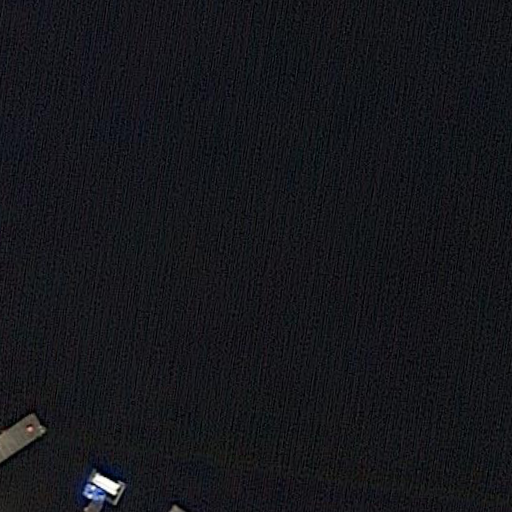

In [47]:
img_df = dynamic_df[dynamic_df['image_file']=='P0019_69.png']
display(img_df)
print(img_df.image_path.item())
img = Image.open(img_df.image_path.item())
display(img)




image_id                                                        8328
image_file                                              P2625_66.png
image_path         E:/datasets/DOTA_dataset_512/val/images/P2625_...
prompt                         Question: is anything moving? Answer:
generated_text                                                   yes
category                                                           1
processing_time                                             1.090846
moving                                                          True
Name: 108462, dtype: object

E:/datasets/DOTA_dataset_512/val/images/P2625_66.png


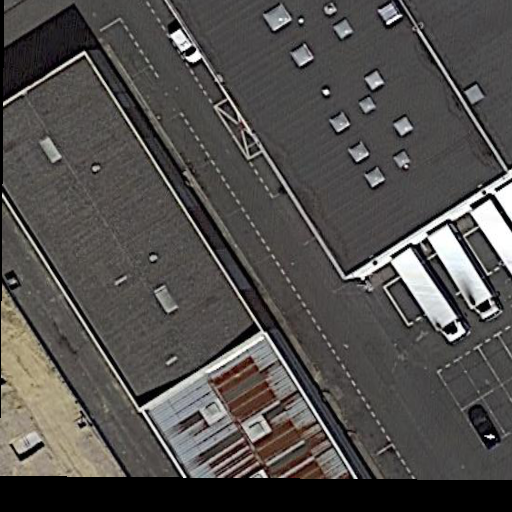

In [48]:
moving_df = dynamic_df[dynamic_df['moving']==True]
for i in range(1):
    img_ind = random.choice(range(len(moving_df.index)))
    row = moving_df.iloc[img_ind]
    display(row)
    print(row.image_path)
    img = Image.open(row.image_path)
    display(img)

In [49]:
caption_df = prompt_results_df[prompt_results_df['prompt']=='']
movement_words = [
    "driving", "moving", "speeding", "going", "running", "walking", 
    "traveling", "advancing", "racing", "gliding", "rolling", "flowing", 
    "shifting", "darting", "cruising", "skipping", "drifting", "zooming", 
    "hurrying", "marching", "sprinting", "slithering", "sailing", 
    "flying", "strolling", 'going'
]
caption_df['contains_word'] = caption_df['generated_text'].apply(lambda x: any(word in x for word in movement_words))

movement_df = caption_df[caption_df['contains_word']==True]

C:\Users\neals\AppData\Local\Temp\ipykernel_9180\2887349971.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  caption_df['contains_word'] = caption_df['generated_text'].apply(lambda x: any(word in x for word in movement_words))


image_id                                                        3936
image_file                                              P1332_22.png
image_path         E:/datasets/DOTA_dataset_512/val/images/P1332_...
prompt                                                              
generated_text     a black and white image of a plane flying in t...
category                                                           1
processing_time                                             1.004438
contains_word                                                   True
Name: 54579, dtype: object

E:/datasets/DOTA_dataset_512/val/images/P1332_22.png


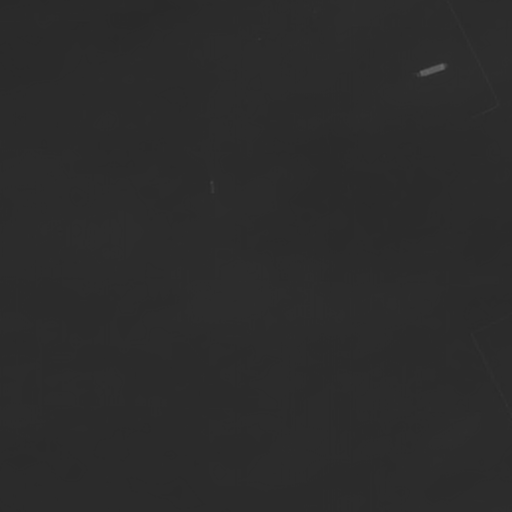

image_id                                                        3923
image_file                                               P1332_2.png
image_path         E:/datasets/DOTA_dataset_512/val/images/P1332_...
prompt                                                              
generated_text        a plane flying through the air in the dark sky
category                                                           1
processing_time                                             1.046666
contains_word                                                   True
Name: 54460, dtype: object

E:/datasets/DOTA_dataset_512/val/images/P1332_2.png


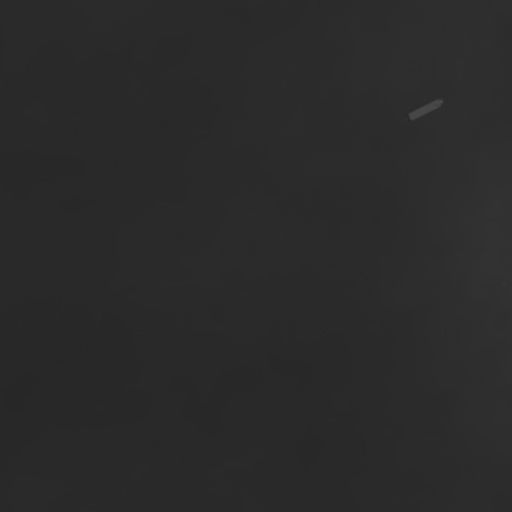

image_id                                                        3451
image_file                                               P1219_2.png
image_path         E:/datasets/DOTA_dataset_512/val/images/P1219_...
prompt                                                              
generated_text     a black and white photo of a plane flying in t...
category                                                           1
processing_time                                             1.025487
contains_word                                                   True
Name: 51373, dtype: object

E:/datasets/DOTA_dataset_512/val/images/P1219_2.png


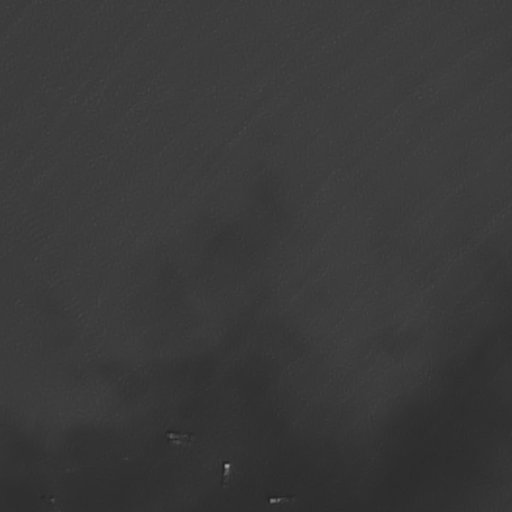

image_id                                                        3929
image_file                                              P1332_13.png
image_path         E:/datasets/DOTA_dataset_512/val/images/P1332_...
prompt                                                              
generated_text     a black and white photo of a plane flying in t...
category                                                           1
processing_time                                             1.034456
contains_word                                                   True
Name: 54502, dtype: object

E:/datasets/DOTA_dataset_512/val/images/P1332_13.png


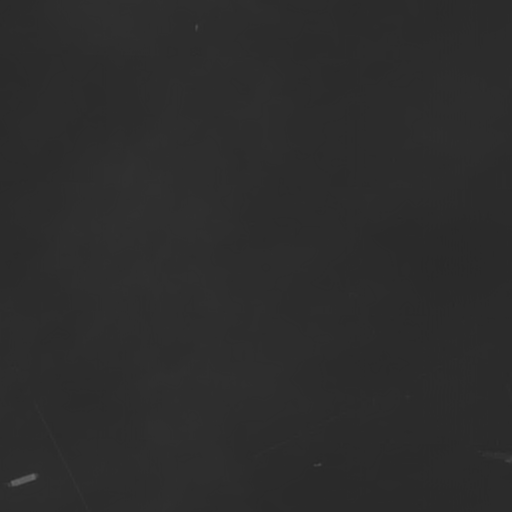

image_id                                                        3956
image_file                                              P1332_67.png
image_path         E:/datasets/DOTA_dataset_512/val/images/P1332_...
prompt                                                              
generated_text     a black and white photo of a plane flying in t...
category                                                           1
processing_time                                             1.025051
contains_word                                                   True
Name: 54816, dtype: object

E:/datasets/DOTA_dataset_512/val/images/P1332_67.png


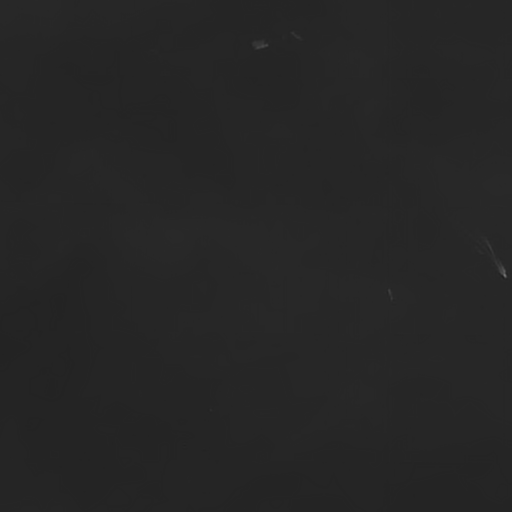

In [66]:

for i in range(5):
    img_ind = random.choice(range(len(movement_df.index)))
    row = movement_df.iloc[img_ind]
    display(row)
    print(row.image_path)
    img = Image.open(row.image_path)
    display(img)